In [151]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('tatavg1.csv')
#Printing head
df.head()

,Date,Average_Price
0,01-Jan-2018,430.49
1,02-Jan-2018,433.41
2,03-Jan-2018,435.06
3,04-Jan-2018,429.56
4,05-Jan-2018,432.92


In [152]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('tatavg1.csv', nrows = 247)

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:200] 
test=df[200:]


In [153]:
df['Date'] = pd.to_datetime(df['Date'])

In [154]:
df.index = df['Date']

In [155]:
df = df.resample('D').mean()

In [156]:
train['Date'] = pd.to_datetime(train['Date'])
train.index = train['Date']
#train = train.resample('D').mean()

In [157]:
test['Date'] = pd.to_datetime(test['Date'])
test.index = test['Date']
#test = test.resample('D').mean()

In [158]:
#test.head()
test.tail()

,Date,Average_Price
Date,,
2018-12-26,2018-12-26,169.98
2018-12-27,2018-12-27,169.87
2018-12-28,2018-12-28,171.15
2018-12-31,2018-12-31,172.80
2019-01-01,2019-01-01,172.71


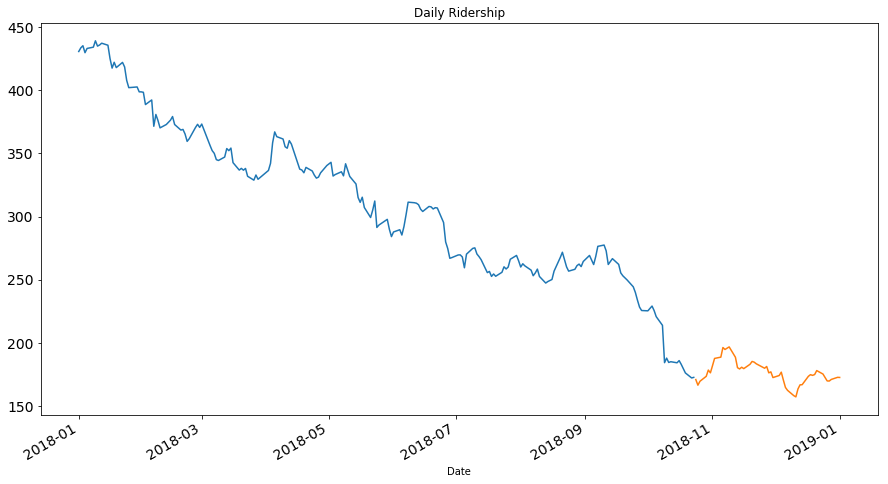

In [159]:
##Plotting data
train.Average_Price.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Average_Price.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

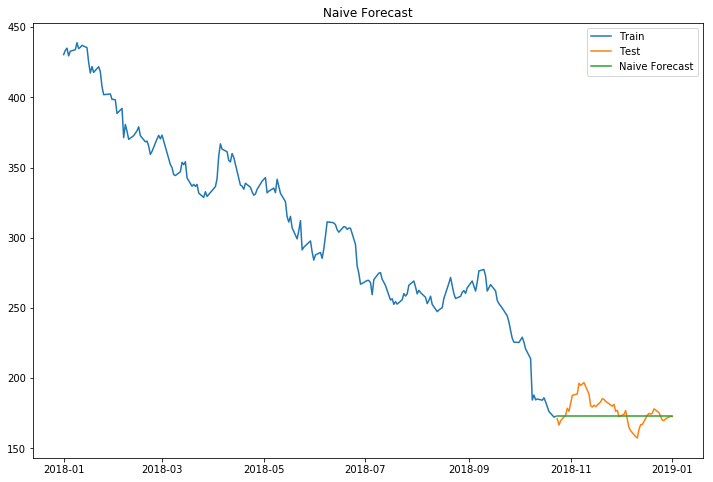

In [160]:
dd= np.asarray(train.Average_Price)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Average_Price'], label='Train')
plt.plot(test.index,test['Average_Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Average_Price, y_hat.naive))
print(rms)

9.565736283125194


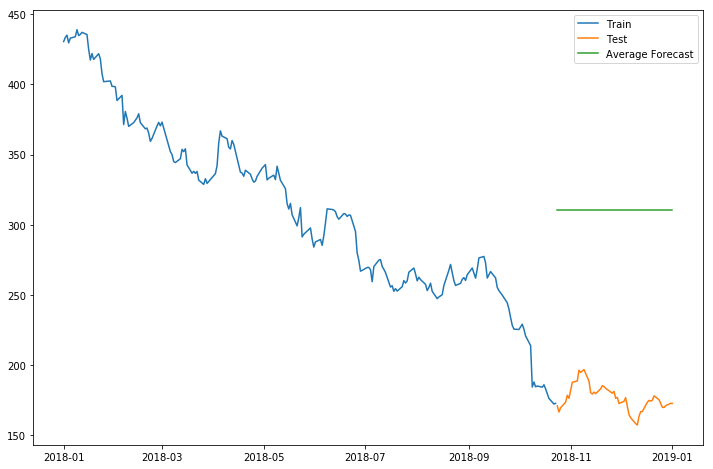

In [163]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Average_Price'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Average_Price'], label='Train')
plt.plot(test['Average_Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [165]:
rms = sqrt(mean_squared_error(test.Average_Price, y_hat_avg.avg_forecast))
print(rms)

134.70891439533298


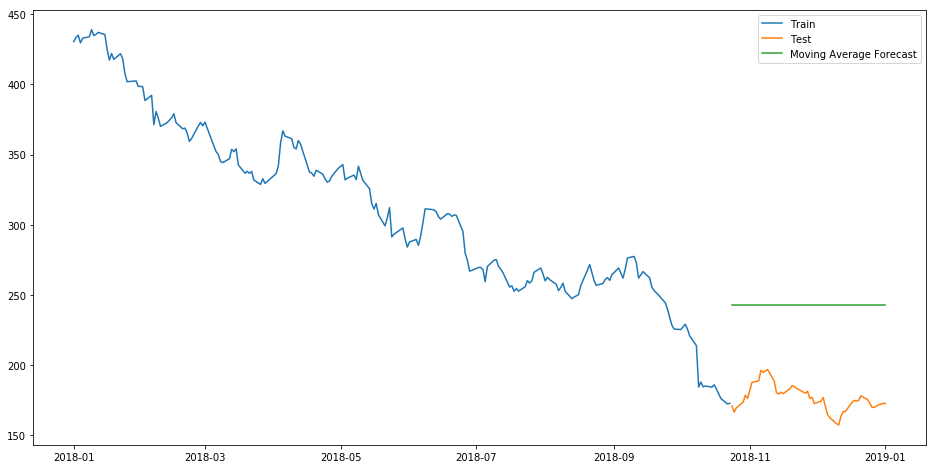

In [166]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Average_Price'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Average_Price'], label='Train')
plt.plot(test['Average_Price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [168]:
rms = sqrt(mean_squared_error(test.Average_Price, y_hat_avg.moving_avg_forecast))
print(rms)

66.80933755238976


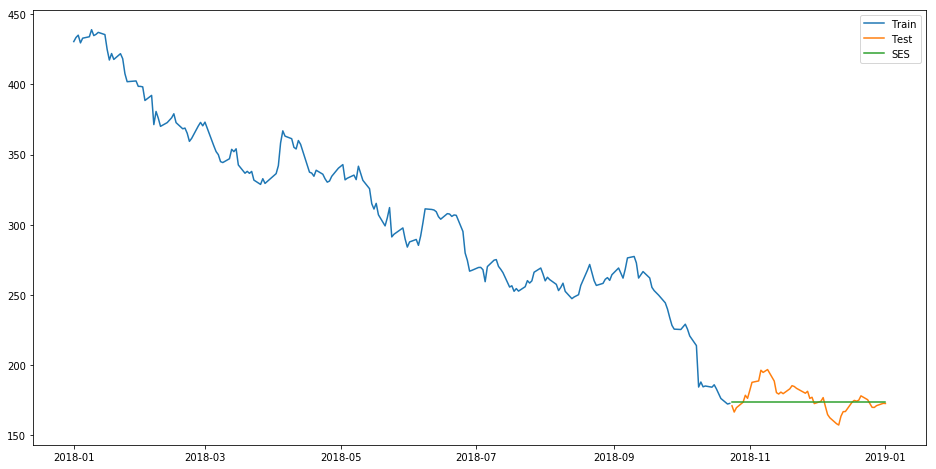

In [169]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Average_Price'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Average_Price'], label='Train')
plt.plot(test['Average_Price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [170]:
rms = sqrt(mean_squared_error(test.Average_Price, y_hat_avg.SES))
print(rms)


9.257563214980776


In [140]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Average_Price).plot()
result = sm.tsa.stattools.adfuller(train.Average_Price)
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

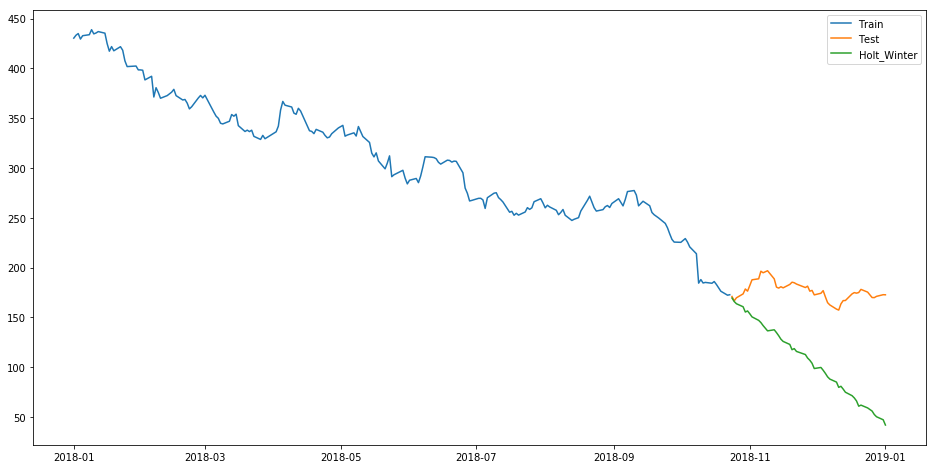

In [171]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Average_Price']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Average_Price'], label='Train')
plt.plot(test['Average_Price'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [173]:
rms = sqrt(mean_squared_error(test.Average_Price, y_hat_avg.Holt_Winter))
print(rms)

77.2764142463477


In [150]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Average_Price, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=pd.to_datetime('2018-10-24'), end=pd.to_datetime('2019-01-01'), dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Average_Price'], label='Train')
plt.plot(test['Average_Price'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'